<a href="https://colab.research.google.com/github/kangjunseo/MachineLearning/blob/main/Machine%20Learning%20Algorithms_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gaussian Processes

Machine Learning Algorithms

Dates: 2022-4-29

Author: Yung-Kyun Noh

Department of Computer Science, Hanyang University & KIAS

Ref: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gaussian kernel
def GaussianKernel(X1, X2, sig=1.):
    dists = np.sum(X1**2, axis=1).reshape([-1,1]) + \
        np.sum(X2**2, axis=1).reshape([1,-1]) - \
        2*np.matmul(X1, X2.T)
    K = np.exp(-.5*dists/sig**2)
    return K

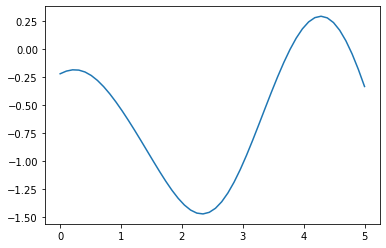

In [7]:
n_sample = 50
xs = np.linspace(0, 5, n_sample).reshape([-1,1])
K = GaussianKernel(xs, xs)  # covariances
ys = np.random.multivariate_normal(np.zeros(n_sample), K, 1)

plt.plot(xs.T[0], ys[0])

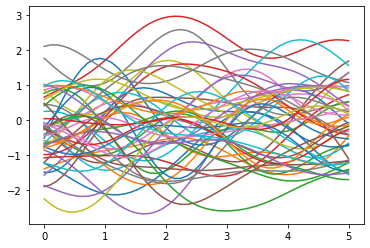

In [8]:
# Collection of functions
gp_sample_n = 50
ys = np.random.multivariate_normal(np.zeros(n_sample), K, gp_sample_n)

for i in range(gp_sample_n):
    plt.plot(xs.T[0], ys[i])


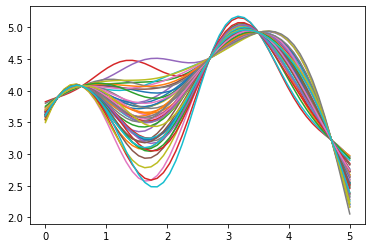

In [9]:
# Data generation
tr_xs = np.array([[.2, .6, 2.7, 3.5, 4.7]]).T
tr_ys = np.array([[.95, 1, 1.11, 1.1, 1.05]]).T

k = GaussianKernel(tr_xs, xs)  # covariances
K = GaussianKernel(tr_xs, tr_xs)
invK = np.linalg.inv(K)

m_fun = np.matmul(np.matmul(k.T, K), tr_ys).T[0]

sigsq = .1
k_fun = GaussianKernel(xs, xs) - np.matmul(np.matmul(k.T, invK), k)

ys = np.random.multivariate_normal(m_fun, k_fun, gp_sample_n)

for i in range(gp_sample_n):
    plt.plot(xs.T[0], ys[i])
